In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from data import DataProvider
import typing as T
import numpy as np

In [2]:
provider = DataProvider()
raw_df = provider.read_excel()
scaled_df = provider.scale_data(raw_df)

In [3]:
charging_df_0_2 = provider.get_charging_data(scaled_df, 0, -2)
charging_df_2_8 = provider.get_charging_data(scaled_df, -2, -8)
charging_df_8_14 = provider.get_charging_data(scaled_df, -8, -14)

charging_dfs = [charging_df_0_2, charging_df_2_8, charging_df_8_14]
rangesStrings = ["0A - 2A", "2A - 8A", "8A - 14A"]

In [4]:
from BaggingBenchmaker import EnsembleModelBenchmarker
from utils import predict_and_plot

ensemble_benchmarker = EnsembleModelBenchmarker(n_estimators=10)
results = ensemble_benchmarker.run_benchmark(charging_dfs, rangesStrings)


⚡ Processing Charging Range 1 (0A - 2A) with a 10-model ensemble...
  -> Training estimator 1/10...
  -> Training estimator 2/10...
  -> Training estimator 3/10...
  -> Training estimator 4/10...
  -> Training estimator 5/10...
  -> Training estimator 6/10...
  -> Training estimator 7/10...
  -> Training estimator 8/10...
  -> Training estimator 9/10...
  -> Training estimator 10/10...
  ✅ Ensemble Done. MAE: 0.3905 V | R²: 0.6477

⚡ Processing Charging Range 2 (2A - 8A) with a 10-model ensemble...
  -> Training estimator 1/10...
  -> Training estimator 2/10...
  -> Training estimator 3/10...
  -> Training estimator 4/10...
  -> Training estimator 5/10...
  -> Training estimator 6/10...
  -> Training estimator 7/10...
  -> Training estimator 8/10...
  -> Training estimator 9/10...
  -> Training estimator 10/10...
  ✅ Ensemble Done. MAE: 0.2650 V | R²: 0.6565

⚡ Processing Charging Range 3 (8A - 14A) with a 10-model ensemble...
  -> Training estimator 1/10...
  -> Training estimator 2/


--- Visualizing Best Model: 0A - 2A ---
  -> MAE of Model: 0.3905
  -> MSE of Model: 0.284473
  -> R2 of Model: 0.647730

--- Metrics vs. Smoothed Baseline for '0A - 2A' ---
  Smoothed MAE: 0.2084 V
  Smoothed MSE: 0.0638
  Smoothed R²:  0.6833
-------------------------------------------------


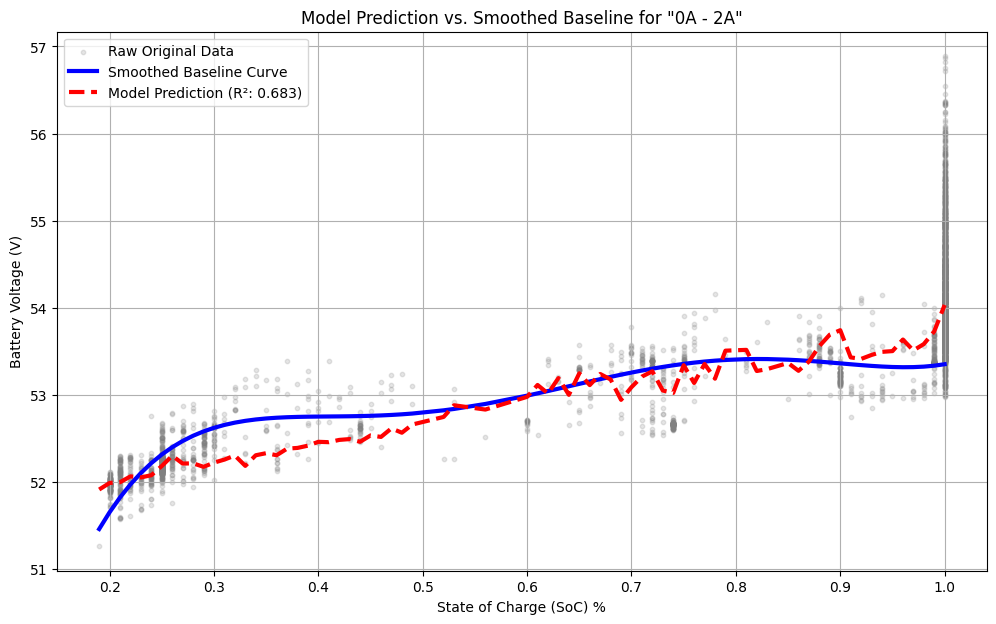


--- Visualizing Best Model: 2A - 8A ---
  -> MAE of Model: 0.2650
  -> MSE of Model: 0.121836
  -> R2 of Model: 0.656487

--- Metrics vs. Smoothed Baseline for '2A - 8A' ---
  Smoothed MAE: 0.1454 V
  Smoothed MSE: 0.0360
  Smoothed R²:  0.8057
-------------------------------------------------


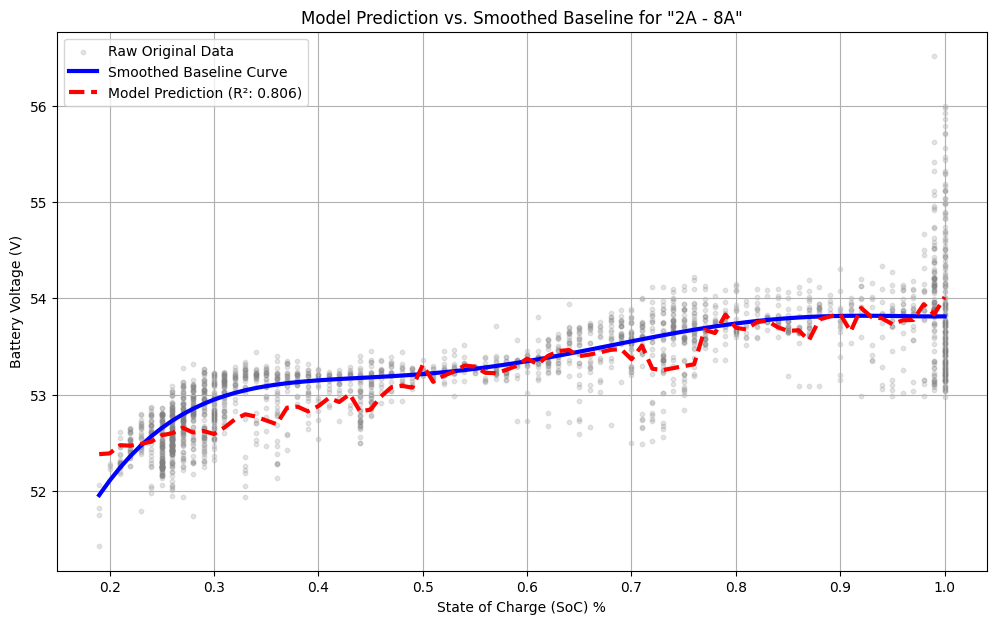


--- Visualizing Best Model: 8A - 14A ---
  -> MAE of Model: 0.2417
  -> MSE of Model: 0.118015
  -> R2 of Model: 0.656841

--- Metrics vs. Smoothed Baseline for '8A - 14A' ---
  Smoothed MAE: 0.1005 V
  Smoothed MSE: 0.0148
  Smoothed R²:  0.9061
-------------------------------------------------


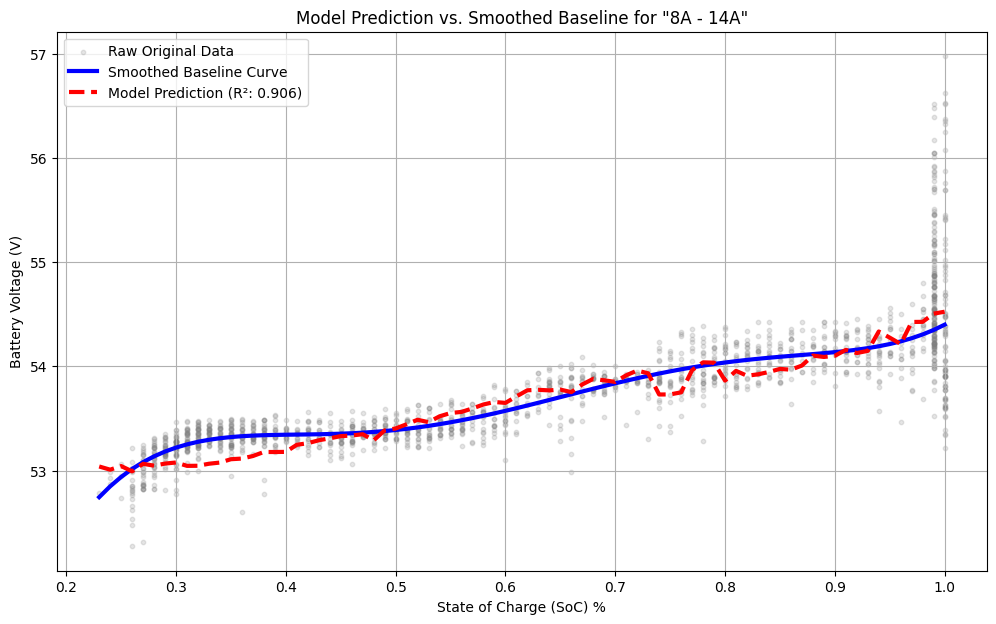

In [5]:
# --- Select the best result to visualize ---
for key, result in results.items():
    y_true = result['y_true'].flatten()
    y_pred = result['y_pred'].flatten()
    df_original = result["df_original"]

    print(f"\n--- Visualizing Best Model: {key} ---")
    print(f"  -> MAE of Model: {result["mae"]:.4f}")
    print(f"  -> MSE of Model: {result["mse"]:.6f}")
    print(f"  -> R2 of Model: {result["r2"]:.6f}")

    predict_and_plot(key, results, provider)